In [1]:
#check python version
from platform import python_version
python_version()

'3.10.7'

In [155]:
#import the modules and packages
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from datetime import datetime
from dateutil import relativedelta

In [156]:
#Combine all .csv files into one .csv file

#read the path
file_path = "/Users/thanawitouioutai/IFN704/Dataset_more_than_10_revisions/"
#list all the files from the directory
file_list = os.listdir(file_path)
#file_list

#Combining multiple files with the similar table structure using pandas.concat()
df_concat = pd.concat([pd.read_csv(file_path+file) for file in file_list ], ignore_index=True)
df_concat

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
0,33366003,User:Wikihelper17,454889962,2011-10-10T16:10:18Z,15499992,Wikihelper17
1,33366003,User:Wikihelper17,602037585,2014-03-31T00:32:06Z,71.243.215.158,NaN
2,33366003,User:Wikihelper17,701335772,2016-01-23T23:15:22Z,172.251.43.90,NaN
3,33366003,User:Wikihelper17,457988878,2011-10-29T16:27:21Z,14836860,Cyberpower678
4,33366003,User:Wikihelper17,468801893,2011-12-31T17:47:56Z,2943983,SoCalSuperEagle
...,...,...,...,...,...,...
6018576,917050,Talk:Voyager 2,1035302995,2021-07-24T21:45:29Z,38179619,PearBOT II
6018577,917050,Talk:Voyager 2,1046476052,2021-09-25T21:45:08Z,27936225,Amphioxi
6018578,917050,Talk:Voyager 2,1046479417,2021-09-25T22:13:18Z,2043601,BilCat
6018579,917050,Talk:Voyager 2,1067977188,2022-01-26T03:35:53Z,2600:8801:2097:3A00:C820:3F55:BA45:B381,NaN


From the result of "df_concat", we have already check that the "df_concat" include our all .csv files by checking the first and last file from "file_list".
* file_list[0:9]
* file_list[-9:]

In [157]:
# check missing values in each columns
df_concat.isna().sum() 

Page ID                   0
Page title                0
Revision ID               0
Timestamp                 0
Contributor ID          260
Contributor name    1662256
dtype: int64

So, we remove the row that contain missing values

In [158]:
# load bots list
bot_list = pd.read_csv('/Users/thanawitouioutai/IFN704/Code_project_analysis/Bots_list.csv')
bot_list = bot_list['Bot name'].values.tolist()
len(bot_list)

1137

In [159]:
# see bot row before preprocessing
df_concat[df_concat["Contributor name"].isin(bot_list)]

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
7,33366003,User:Wikihelper17,479331280,2012-02-28T18:05:00Z,13286072,ClueBot NG
8,33366003,User:Wikihelper17,490146584,2012-05-01T16:24:10Z,13286072,ClueBot NG
9,33366003,User:Wikihelper17,511415879,2012-09-08T18:50:40Z,13286072,ClueBot NG
12,33366003,User:Wikihelper17,517568790,2012-10-13T13:11:59Z,13286072,ClueBot NG
13,33366003,User:Wikihelper17,522315747,2012-11-10T11:14:43Z,13286072,ClueBot NG
...,...,...,...,...,...,...
6018565,917050,Talk:Voyager 2,912434623,2019-08-25T15:31:31Z,4936590,SineBot
6018570,917050,Talk:Voyager 2,947282862,2020-03-25T11:48:43Z,4936590,SineBot
6018571,917050,Talk:Voyager 2,947394517,2020-03-26T01:18:36Z,17518500,Lowercase sigmabot III
6018575,917050,Talk:Voyager 2,1006465920,2021-02-13T01:24:45Z,17518500,Lowercase sigmabot III


In [160]:
#pre-processing the dataset

# Drop rows which contain any NaN value. This is becuase these people who were contributed anonymously
df_concat = df_concat.dropna(how = "any", subset = ["Contributor name"])

# Drop rows which the contributor name is bots
df_concat = df_concat[~df_concat["Contributor name"].isin(bot_list)]

# replace T with space and remove Z in Timestamp
for i in range(len(df_concat)):
    df_concat.iloc[i,3] = df_concat.iloc[i,3].replace("T", " ").strip("Z")

# convert Timestamp column to be datetime type
df_concat["Timestamp"] = pd.to_datetime(df_concat["Timestamp"])





In [161]:
# see row affter preprocessing
df_concat

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
0,33366003,User:Wikihelper17,454889962,2011-10-10 16:10:18,15499992,Wikihelper17
3,33366003,User:Wikihelper17,457988878,2011-10-29 16:27:21,14836860,Cyberpower678
4,33366003,User:Wikihelper17,468801893,2011-12-31 17:47:56,2943983,SoCalSuperEagle
5,33366003,User:Wikihelper17,473704051,2012-01-28 16:15:14,4174864,Smsarmad
6,33366003,User:Wikihelper17,473871291,2012-01-29 15:53:17,3884072,FlyingLeopard2014
...,...,...,...,...,...,...
6018573,917050,Talk:Voyager 2,956105879,2020-05-11 14:54:56,11561890,JustinTime55
6018574,917050,Talk:Voyager 2,1006371786,2021-02-12 14:58:23,39370102,Nanorefs
6018577,917050,Talk:Voyager 2,1046476052,2021-09-25 21:45:08,27936225,Amphioxi
6018578,917050,Talk:Voyager 2,1046479417,2021-09-25 22:13:18,2043601,BilCat


In [162]:
# Now there is no missing value in our dataframe
df_concat.isna().sum()

Page ID             0
Page title          0
Revision ID         0
Timestamp           0
Contributor ID      0
Contributor name    0
dtype: int64

In [163]:
df_concat.info(null_counts=True)

/var/folders/d3/1p34hjc12rd76_cpm1hdhh0r0000gn/T/ipykernel_49705/792546190.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_concat.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848168 entries, 0 to 6018580
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Page ID           3848168 non-null  object        
 1   Page title        3848168 non-null  object        
 2   Revision ID       3848168 non-null  object        
 3   Timestamp         3848168 non-null  datetime64[ns]
 4   Contributor ID    3848168 non-null  object        
 5   Contributor name  3848168 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 205.5+ MB


In [164]:
# see the value count of contributer name
df_concat['Contributor name'].value_counts()

StuRat          25503
Mdnavman        15160
PrimeHunter     14979
LSGH            13643
Shellwood       12979
                ...  
Bossmain231         1
Bdcampbell89        1
Cradlic             1
Inkslinger          1
Amphioxi            1
Name: Contributor name, Length: 327587, dtype: int64

In [13]:
# Export this dataframe to .csv file
#df_concat.to_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataset_>10revisions_no_NaN_and_datetime.csv", index = None)

In [89]:
# Now we will use this dataset to analyse
#df = pd.read_csv("/Users/thanawitouioutai/IFN704/Code_project_analysis/Dataset_>10revisions_no_NaN_and_datetime.csv")

We have problem with the dataframe from the exported file.

So, we will use the df_concat to all analysis

In [165]:
df_concat["Contributor ID"].value_counts().rename_axis("Contributor ID").reset_index(name="counts")

,Contributor ID,counts
0,367436,25503
1,7061136,15160
2,551300,14979
3,38910429,13643
4,2366721,12979
...,...,...
327561,3203211,1
327562,3316275,1
327563,4504119,1
327564,5651821,1


In [166]:
# create list which contains only contributor ID which edited >= 100 times

df_Contributor_ID = df_concat["Contributor ID"].value_counts().rename_axis("Contributor ID").reset_index(name="counts")

df_Contributor_ID_edit_morethan_100 = df_Contributor_ID[df_Contributor_ID["counts"]>=100]

list_Contributor_ID_edit_morethan_100 = list(df_Contributor_ID_edit_morethan_100["Contributor ID"])
len(list_Contributor_ID_edit_morethan_100)

6088

In [167]:
df_Contributor_ID_edit_morethan_100

,Contributor ID,counts
0,367436,25503
1,7061136,15160
2,551300,14979
3,38910429,13643
4,2366721,12979
...,...,...
6083,173030,100
6084,2551723,100
6085,2847625,100
6086,40236449,100


In [168]:
# see statistical
df_Contributor_ID_edit_morethan_100['counts'].describe()

count     6088.000000
mean       388.208279
std        802.553045
min        100.000000
25%        134.000000
50%        199.000000
75%        352.250000
max      25503.000000
Name: counts, dtype: float64

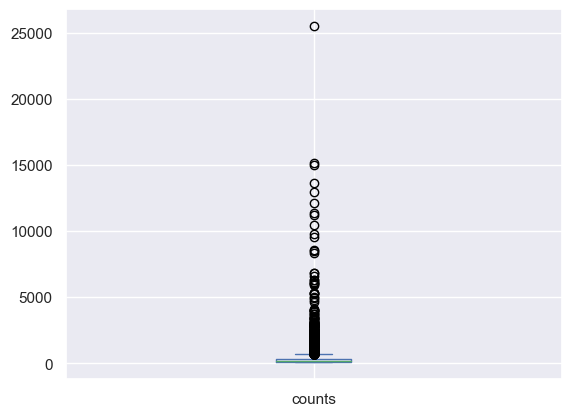

In [169]:
# histrogram is not work for visualizasion, thus we use boxplot
df_Contributor_ID_edit_morethan_100['counts'].plot.box()
plt.show()



In [170]:
# Calculate logarithm to 
# base 10 on 'counts' column
df_Contributor_ID_edit_morethan_100['logarithm_base10'] = np.log10(df_Contributor_ID_edit_morethan_100['counts'])

/var/folders/d3/1p34hjc12rd76_cpm1hdhh0r0000gn/T/ipykernel_49705/4205016002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Contributor_ID_edit_morethan_100['logarithm_base10'] = np.log10(df_Contributor_ID_edit_morethan_100['counts'])


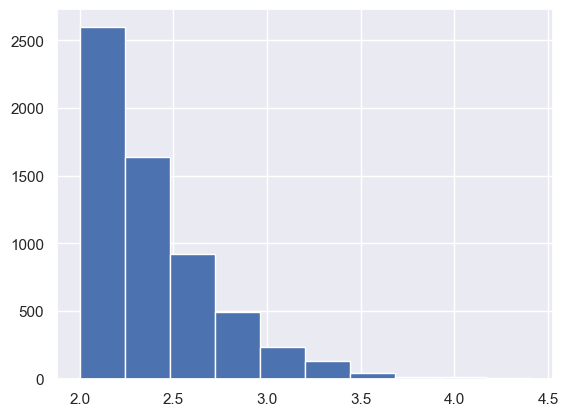

In [171]:
plt.hist(df_Contributor_ID_edit_morethan_100['logarithm_base10'])
plt.show()

In [172]:
# select rows which contain the Contributor ID in "list_Contributor_ID_edit_morethan_100"
df_edited_100 = df_concat[df_concat["Contributor ID"].isin(list_Contributor_ID_edit_morethan_100)]
df_edited_100

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
3,33366003,User:Wikihelper17,457988878,2011-10-29 16:27:21,14836860,Cyberpower678
5,33366003,User:Wikihelper17,473704051,2012-01-28 16:15:14,4174864,Smsarmad
6,33366003,User:Wikihelper17,473871291,2012-01-29 15:53:17,3884072,FlyingLeopard2014
10,33366003,User:Wikihelper17,516347399,2012-10-06 18:18:54,13863430,O.Koslowski
11,33366003,User:Wikihelper17,517266936,2012-10-11 20:50:21,7641765,Noq
...,...,...,...,...,...,...
6018566,917050,Talk:Voyager 2,928665964,2019-11-30 21:20:31,2542622,Rod57
6018567,917050,Talk:Voyager 2,928666206,2019-11-30 21:22:41,2542622,Rod57
6018568,917050,Talk:Voyager 2,928666276,2019-11-30 21:23:10,2542622,Rod57
6018573,917050,Talk:Voyager 2,956105879,2020-05-11 14:54:56,11561890,JustinTime55


In [175]:
len(df_edited_100['Page ID'].unique())

9818

## Construct features

In [173]:
# Now your dataset is df_edited_100
df_edited_100.info(null_counts=True)

/var/folders/d3/1p34hjc12rd76_cpm1hdhh0r0000gn/T/ipykernel_49705/1422499724.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_edited_100.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363412 entries, 3 to 6018578
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Page ID           2363412 non-null  object        
 1   Page title        2363412 non-null  object        
 2   Revision ID       2363412 non-null  object        
 3   Timestamp         2363412 non-null  datetime64[ns]
 4   Contributor ID    2363412 non-null  object        
 5   Contributor name  2363412 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 126.2+ MB


### Ratio
* The ratio between the number of edits and the number of days a contributor has been on Wikipedia from the very first edit
* We know that there are 6088 contributor IDs which have made more than 100 edits.
* We know that there are 9818 page IDs in current data

In [118]:
list_ids = list(df_edited_100["Contributor ID"].unique())

In [119]:
# Create new dataframe to store only the Contributor ID and their feature
df_features = pd.DataFrame(list_ids, columns =["Contributor ID"])
df_features

,Contributor ID
0,14836860
1,4174864
2,3884072
3,13863430
4,7641765
...,...
6084,36333
6085,215270
6086,23009700
6087,21894200


In [120]:
# find Ratio feature
def cal_ratio_feature(list_ids, df_edited_100):
    ratio_list = []
    
    for id in list_ids:
        # find the most recent date from Contributor ID
        latest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].max()
        # find the least recent date from Contributor ID
        earliest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].min()
        # find the number of days a contributor has been on Wikipedia from the very first edit
        num_days = (latest_time - earliest_time).days

        # find the number of edits
        num_edits = len(df_edited_100[df_edited_100["Contributor ID"] == id])

        # append the ratio value from each id into the list of ratio
        ratio_list.append(num_edits/num_days)

    return ratio_list

In [121]:
# 25m 15.7s
ratio_feature_list = cal_ratio_feature(list_ids, df_edited_100)
ratio_feature_list

[0.029985855728429985,
 0.06128221244500314,
 0.048846675712347354,
 0.05855685681904042,
 0.0581901014702837,
 0.30171073094867806,
 0.03604768059744363,
 0.8828193832599119,
 0.23366686286050617,
 0.03532155948017328,
 0.03758198900904095,
 0.017956971031678808,
 0.11356986100950987,
 0.47594330205629864,
 0.8194126956215931,
 0.05989911727616646,
 0.032410693162999764,
 0.02133489919749462,
 0.07033388067870827,
 0.47048192771084335,
 0.024093722369584437,
 0.06361547976674324,
 0.01883716717985872,
 0.06381896770912789,
 0.03584029712163417,
 0.030758476057322615,
 0.025434399395618233,
 0.06471238938053098,
 0.2709757613424487,
 0.08260233918128655,
 0.02847981893625047,
 0.09640102827763496,
 0.2020510975170925,
 0.0615539858728557,
 0.04136480486094882,
 0.08163265306122448,
 0.025622775800711744,
 0.04174120453190221,
 0.03880453121234032,
 0.0655327663831916,
 0.7855734472559974,
 0.13291906638375264,
 0.03983117910841467,
 0.14163335237007424,
 0.12522045855379188,
 0.0407534

In [122]:
df_features["Ratio"] = ratio_feature_list
df_features

,Contributor ID,Ratio
0,14836860,0.029986
1,4174864,0.061282
2,3884072,0.048847
3,13863430,0.058557
4,7641765,0.058190
...,...,...
6084,36333,0.573684
6085,215270,2.345455
6086,23009700,0.270153
6087,21894200,0.426702


In [123]:
df_features['Ratio'].describe()

count    6089.000000
mean        0.339142
std         3.825458
min         0.015083
25%         0.045753
50%         0.088726
75%         0.202451
max       254.000000
Name: Ratio, dtype: float64

In [133]:
# see the row that provide max ratio
df_features.sort_values(by='Ratio', ascending=False)

,Contributor ID,Ratio
118,1233731,254.000000
5211,42038981,123.219780
5210,41676291,40.031646
5920,24322760,37.000000
4605,38910429,31.654292
...,...,...
102,31530,0.016161
242,173030,0.016119
2996,122969,0.016067
4088,61920,0.015878


In [138]:
df_edited_100[df_edited_100['Contributor ID']=='1233731'].sort_values(by='Timestamp', ascending=True)

,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name
119128,1673,Alfonso IX of Spain,3942717,2004-06-03 16:06:13,1233731,Template namespace initialisation script
1509746,13673,Herod Agrippa I,4913798,2004-06-03 16:06:50,1233731,Template namespace initialisation script
2542528,14200,Heinrich Abeken,5671833,2004-06-03 16:06:53,1233731,Template namespace initialisation script
2907943,18041,Liber Memorialis,4078756,2004-06-03 16:07:03,1233731,Template namespace initialisation script
2782135,38298,George Boole,4032721,2004-06-03 16:07:23,1233731,Template namespace initialisation script
...,...,...,...,...,...,...
3848946,420438,Steven Tyler,4890997,2004-06-06 09:22:36,1233731,Template namespace initialisation script
5161035,465522,Fragarach,4115992,2004-06-06 09:24:40,1233731,Template namespace initialisation script
131120,572465,Alan Cranston,4216231,2004-06-06 09:28:56,1233731,Template namespace initialisation script
134489,572506,Partitions of a set,11677834,2004-06-06 09:28:57,1233731,Template namespace initialisation script


In [139]:
x = df_edited_100[df_edited_100['Contributor ID']=='1233731'].sort_values(by='Timestamp', ascending=True)

In [153]:
x['Timestamp'].max() - x['Timestamp'].min()

Timedelta('2 days 17:24:35')

## Mean_gap & Max_gap
* The average gap between two consecutive posts measured in days
* Max_gap is a measure about the longest period of inactivity between two successive posts.

In [20]:
# find Mean_gap and Max_gap features
def cal_Mean_and_Max_gap_feature(list_ids, df_edited_100):
    mean_gap_list = []
    max_gap_list = []
    
    for id in list_ids:
        # find average gap between two consecutive posts measured in days
        mean_gap = df_edited_100[df_edited_100["Page ID"] == id]["Timestamp"].sort_values().diff().mean()

        # find the max gap between two consecutive polsts measured in days
        max_gap = df_edited_100[df_edited_100["Page ID"] == id]["Timestamp"].sort_values().diff().max()

        # add to list
        mean_gap_list.append(mean_gap.days)
        max_gap_list.append(max_gap.days)

    return mean_gap_list, max_gap_list

In [21]:
# 21m 2.4s
# caluculate mean_gap and max_gap features
mean_gap_feature_list, max_gap_feature_list = cal_Mean_and_Max_gap_feature(list_ids, df_edited_100)
mean_gap_feature_list


[16,
 64,
 5,
 28,
 4,
 18,
 28,
 9,
 10,
 28,
 58,
 29,
 17,
 22,
 18,
 15,
 25,
 17,
 26,
 3,
 37,
 34,
 19,
 29,
 12,
 5,
 17,
 4,
 17,
 46,
 50,
 28,
 26,
 35,
 43,
 57,
 45,
 28,
 37,
 8,
 22,
 12,
 14,
 66,
 23,
 4,
 61,
 21,
 16,
 37,
 36,
 9,
 20,
 22,
 2,
 1,
 38,
 40,
 15,
 2,
 3,
 30,
 57,
 3,
 37,
 29,
 0,
 25,
 69,
 2,
 69,
 5,
 3,
 63,
 13,
 41,
 12,
 30,
 9,
 56,
 40,
 19,
 34,
 30,
 49,
 56,
 14,
 42,
 47,
 43,
 24,
 48,
 57,
 58,
 23,
 27,
 9,
 7,
 0,
 45,
 8,
 36,
 3,
 31,
 69,
 9,
 31,
 22,
 25,
 20,
 26,
 58,
 12,
 7,
 25,
 20,
 49,
 52,
 29,
 21,
 43,
 18,
 33,
 55,
 22,
 22,
 27,
 40,
 31,
 22,
 33,
 38,
 44,
 38,
 51,
 41,
 39,
 34,
 59,
 63,
 20,
 12,
 54,
 27,
 34,
 19,
 15,
 50,
 7,
 2,
 2,
 59,
 3,
 7,
 37,
 25,
 16,
 15,
 3,
 2,
 6,
 4,
 19,
 2,
 7,
 11,
 11,
 9,
 1,
 10,
 9,
 17,
 15,
 5,
 35,
 60,
 9,
 38,
 4,
 3,
 1,
 67,
 27,
 19,
 33,
 5,
 4,
 5,
 4,
 4,
 28,
 18,
 24,
 42,
 46,
 58,
 12,
 46,
 27,
 45,
 36,
 42,
 37,
 41,
 38,
 42,
 33,
 30,
 32,
 52,


In [22]:
max_gap_feature_list

# !!!!!the result must not be negative

[314,
 374,
 323,
 828,
 98,
 246,
 289,
 143,
 152,
 300,
 516,
 1609,
 1383,
 1609,
 1609,
 1383,
 1609,
 1487,
 1609,
 88,
 374,
 2450,
 168,
 239,
 247,
 150,
 367,
 444,
 193,
 440,
 600,
 283,
 343,
 404,
 343,
 340,
 390,
 604,
 415,
 764,
 614,
 310,
 233,
 1328,
 216,
 233,
 947,
 258,
 256,
 366,
 195,
 360,
 1551,
 315,
 151,
 323,
 552,
 312,
 366,
 174,
 318,
 479,
 355,
 123,
 390,
 350,
 91,
 346,
 804,
 80,
 420,
 116,
 78,
 501,
 242,
 249,
 238,
 320,
 148,
 930,
 349,
 310,
 294,
 792,
 352,
 593,
 159,
 2072,
 572,
 2911,
 661,
 394,
 1030,
 610,
 228,
 315,
 222,
 122,
 21,
 672,
 223,
 315,
 190,
 356,
 674,
 184,
 254,
 233,
 254,
 288,
 317,
 498,
 184,
 184,
 240,
 234,
 498,
 556,
 263,
 313,
 437,
 234,
 557,
 490,
 329,
 281,
 259,
 538,
 253,
 363,
 331,
 561,
 248,
 402,
 378,
 495,
 518,
 351,
 388,
 373,
 220,
 120,
 680,
 277,
 457,
 689,
 290,
 691,
 357,
 99,
 85,
 702,
 261,
 188,
 469,
 456,
 221,
 271,
 215,
 122,
 126,
 236,
 213,
 244,
 205,
 275

In [23]:
df_features["Mean_gap"] = mean_gap_feature_list
df_features["Max_gap"] = max_gap_feature_list
df_features

,Page ID,Ratio,Mean_gap,Max_gap
0,243688,0.061458,16,314
1,243694,0.015560,64,374
2,243709,0.183834,5,323
3,243713,0.035424,28,828
4,243717,0.214412,4,98
...,...,...,...,...
4197,917036,0.070404,14,3890
4198,917039,0.028814,34,274
4199,917040,0.058121,17,227
4200,917041,0.019997,50,378


In [30]:
df_features.iloc[:,1:].describe()

,Ratio,Mean_gap,Max_gap
count,4202.000000,4202.000000,4202.000000
mean,0.187514,24.413851,430.519752
std,2.393332,18.064679,427.147093
min,0.013661,0.000000,1.000000
25%,0.026224,9.000000,221.000000
50%,0.046560,21.000000,332.000000
75%,0.108755,38.000000,497.000000
max,123.294199,73.000000,5371.000000


### Mean_Month
* Mean_Month: Per month average edits made

In [34]:
# find mean_month feture
def cal_mean_month_feature(list_ids, df_edited_100):
    mean_month_list = []
    
    for id in list_ids:
        # find the most recent date from contributor ID
        latest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].max()
        # find the least recent date from contributor ID
        earliest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].min()
        # find the number of months a contributor has been on Wikipedia from the very first edit
        num_months = (latest_time - earliest_time).months

        # find the number of edits
        num_edits = len(df_edited_100[df_edited_100["Contributor ID"] == id])

        # append the mean_month value from each id into the list of mean_month
        mean_month_list.append(num_edits/num_months)

    return mean_month_list

### SD
* Standard Deviation among the month average edits value

In [ ]:
# find SD feture
def cal_SD_feature(list_ids, df_edited_100):
    SD_list = []
    
    for id in list_ids:


        
        # find the most recent date from contributor ID
        latest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].max()
        # find the least recent date from contributor ID
        earliest_time = df_edited_100[df_edited_100["Contributor ID"] == id]["Timestamp"].min()
        # find the number of months a contributor has been on Wikipedia from the very first edit
        num_months = (latest_time - earliest_time).months

        # find the number of edits
        num_edits = len(df_edited_100[df_edited_100["Contributor ID"] == id])

        # append the mean_month value from each id into the list of mean_month
        mean_month_list.append(num_edits/num_months)

    return mean_month_list

## Num_cons
* The number of pairs of consecutive months with contributions

In [314]:
# convert datetime column to just date
df_edited_100['Date'] = pd.to_datetime(df_edited_100["Timestamp"]).dt.date
df_edited_100

/var/folders/d3/1p34hjc12rd76_cpm1hdhh0r0000gn/T/ipykernel_1269/3012664239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edited_100['Date'] = pd.to_datetime(df_edited_100["Timestamp"]).dt.date


,Page ID,Page title,Revision ID,Timestamp,Contributor ID,Contributor name,Date
3,33366003,User:Wikihelper17,457988878,2011-10-29 16:27:21,14836860,Cyberpower678,2011-10-29
5,33366003,User:Wikihelper17,473704051,2012-01-28 16:15:14,4174864,Smsarmad,2012-01-28
6,33366003,User:Wikihelper17,473871291,2012-01-29 15:53:17,3884072,FlyingLeopard2014,2012-01-29
7,33366003,User:Wikihelper17,479331280,2012-02-28 18:05:00,13286072,ClueBot NG,2012-02-28
8,33366003,User:Wikihelper17,490146584,2012-05-01 16:24:10,13286072,ClueBot NG,2012-05-01
...,...,...,...,...,...,...,...
6018571,917050,Talk:Voyager 2,947394517,2020-03-26 01:18:36,17518500,Lowercase sigmabot III,2020-03-26
6018573,917050,Talk:Voyager 2,956105879,2020-05-11 14:54:56,11561890,JustinTime55,2020-05-11
6018575,917050,Talk:Voyager 2,1006465920,2021-02-13 01:24:45,17518500,Lowercase sigmabot III,2021-02-13
6018576,917050,Talk:Voyager 2,1035302995,2021-07-24 21:45:29,38179619,PearBOT II,2021-07-24


In [224]:
# this code is used for find year, month, or days from two date.
start_date = df_edited_100[df_edited_100["Contributor name"] == "Cyberpower678"]["Date"].iloc[0]
end_date = df_edited_100[df_edited_100["Contributor name"] == "Cyberpower678"]["Date"].iloc[1]

delta = relativedelta.relativedelta(end_date, start_date)
delta.months

8

In [317]:
df_edited_100[df_edited_100["Contributor ID"] == "14836860"]["Date"]

3          2011-10-29
55756      2014-07-22
81540      2012-12-07
81838      2014-07-14
199253     2014-07-14
              ...    
5473279    2014-06-05
5611911    2014-07-14
5696840    2013-08-10
5742295    2012-12-27
5742299    2012-12-30
Name: Date, Length: 106, dtype: object

In [211]:
a = df_edited_100[df_edited_100["Contributor name"] == "Cyberpower678"]["Date"].iloc[0].month
b = df_edited_100[df_edited_100["Contributor name"] == "Cyberpower678"]["Date"].iloc[1].month
b-a

-3

In [231]:
range(len(df_edited_100[df_edited_100["Contributor name"] == "Cyberpower678"]["Timestamp"])-1)

range(0, 105)

In [240]:
a = df_edited_100[df_edited_100["Contributor name"] == "Cyberpower678"]["Date"].iloc[1]
b = df_edited_100[df_edited_100["Contributor name"] == "Cyberpower678"]["Date"].iloc[2]
delta = relativedelta.relativedelta(b, a)
delta.months

-7

In [333]:
df_edited_100[df_edited_100["Contributor ID"] == "14836860"]["Date"].sort_values().diff().iloc[100:]

299787      0 days
299786      0 days
299790      0 days
299796      0 days
2898928   271 days
481999      0 days
Name: Date, dtype: timedelta64[ns]

In [324]:
df_edited_100[df_edited_100["Contributor ID"] == "14836860"]["Date"].sort_values().iloc[2]

datetime.date(2011, 11, 8)

In [338]:
# find Num_cons feature
# if we have time we will run this 
def cal_Num_cons_feature(list_ids, df_edited_100):
    num_cons_list = []
    
    for id in list_ids[0:1]:
        num_cons = 0
        #sub_num_cons_list = []

        for i in range(len(df_edited_100[df_edited_100["Contributor ID"] == id])-1):

            start_date = df_edited_100[df_edited_100["Contributor ID"] == id]["Date"].sort_values().iloc[i]
            end_date = df_edited_100[df_edited_100["Contributor ID"] == id]["Date"].sort_values().iloc[i+1]
            
            # delta is the difference of year, month, or days 
            delta = relativedelta.relativedelta(end_date, start_date)
            
            if delta.years == 0:
                if delta.months == 1:
                    num_cons = num_cons + 1
                else:
                    num_cons = num_cons
            else:
                num_cons = num_cons
            
        # add to list
        num_cons_list.append(num_cons)
    
    return num_cons_list

In [337]:
# We will come back when find other features
num_cons_feature_list = cal_Num_cons_feature(list_ids, df_edited_100)
num_cons_feature_list

[0, 0]

## No scaled data

In [31]:
df_features

,Page ID,Ratio,Mean_gap,Max_gap
0,243688,0.061458,16,314
1,243694,0.015560,64,374
2,243709,0.183834,5,323
3,243713,0.035424,28,828
4,243717,0.214412,4,98
...,...,...,...,...
4197,917036,0.070404,14,3890
4198,917039,0.028814,34,274
4199,917040,0.058121,17,227
4200,917041,0.019997,50,378


In [32]:
# select features
df_select_features = df_features.iloc[:,1:]
df_select_features


,Ratio,Mean_gap,Max_gap
0,0.061458,16,314
1,0.015560,64,374
2,0.183834,5,323
3,0.035424,28,828
4,0.214412,4,98
...,...,...,...
4197,0.070404,14,3890
4198,0.028814,34,274
4199,0.058121,17,227
4200,0.019997,50,378


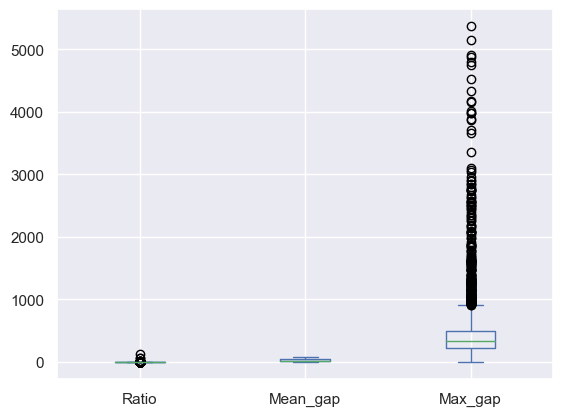

In [33]:
# boxplot
df_select_features.plot.box()
plt.show()

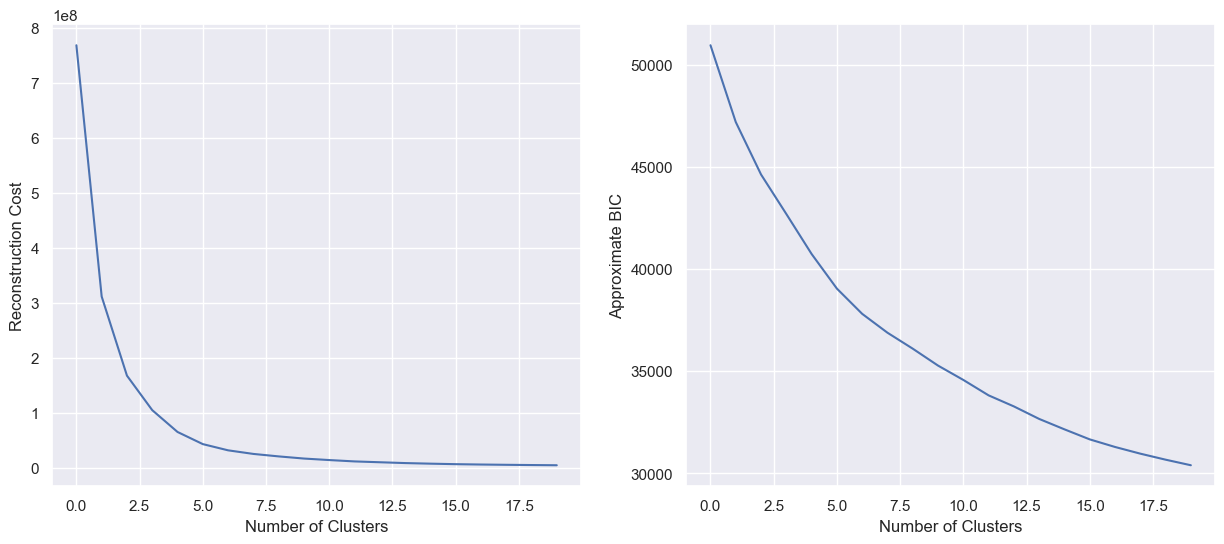

In [34]:
# find optimal k from elbow
num_itts = 10

costs = []
approx_bic = []
for i in range(20):
    c = 0
    a_b = 0
    for r in range(num_itts):
        kmeans = KMeans(n_clusters=i+1, random_state=r).fit(df_select_features)

        c += kmeans.inertia_

        k = np.shape(kmeans.cluster_centers_)[0]*(np.shape(kmeans.cluster_centers_)[1] + 1)
        m = len(df_select_features)        
        a_b += m*np.log(kmeans.inertia_ / m) + k*np.log(m)

    costs.append(c / num_itts)
    approx_bic.append(a_b / num_itts)

fig = plt.figure(figsize=[15, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(costs)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Reconstruction Cost');  

ax = fig.add_subplot(1, 2, 2)
ax.plot(approx_bic)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Approximate BIC');  

In [35]:
# kmean
kmeans = KMeans(n_clusters=2, random_state=2022).fit(df_select_features)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[1.91061579e-01 2.41801516e+01 3.76230995e+02]
 [5.67647214e-02 3.30270270e+01 2.43137838e+03]]
[0 0 0 ... 0 0 0]


In [36]:
# get cluster
nor_clusters = kmeans.predict(df_select_features)
nor_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [37]:
data_with_clusters = df_select_features.copy()
data_with_clusters["Clusters"] = nor_clusters 
data_with_clusters

,Ratio,Mean_gap,Max_gap,Clusters
0,0.061458,16,314,0
1,0.015560,64,374,0
2,0.183834,5,323,0
3,0.035424,28,828,0
4,0.214412,4,98,0
...,...,...,...,...
4197,0.070404,14,3890,1
4198,0.028814,34,274,0
4199,0.058121,17,227,0
4200,0.019997,50,378,0


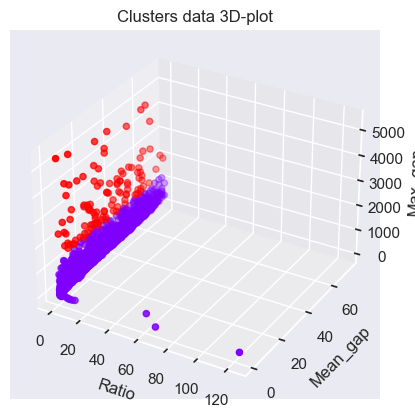

In [38]:
# visualise 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = data_with_clusters["Ratio"], ys = data_with_clusters["Mean_gap"], zs = data_with_clusters["Max_gap"], c = data_with_clusters["Clusters"], cmap="rainbow")
ax.set_title("Clusters data 3D-plot")
ax.set_xlabel("Ratio")
ax.set_ylabel("Mean_gap")
ax.set_zlabel("Max_gap")

plt.show()

## Normalization section

In [39]:
df_features

,Page ID,Ratio,Mean_gap,Max_gap
0,243688,0.061458,16,314
1,243694,0.015560,64,374
2,243709,0.183834,5,323
3,243713,0.035424,28,828
4,243717,0.214412,4,98
...,...,...,...,...
4197,917036,0.070404,14,3890
4198,917039,0.028814,34,274
4199,917040,0.058121,17,227
4200,917041,0.019997,50,378


In [40]:
# normalise data in to range (0,1)
df_select_features = df_features.iloc[:,1:]

d = preprocessing.normalize(df_select_features)
scaled_df = pd.DataFrame(d, columns=df_select_features.columns)
scaled_df.head()

,Ratio,Mean_gap,Max_gap
0,0.000195,0.050889,0.998704
1,0.000041,0.168671,0.985672
2,0.000569,0.015478,0.999880
3,0.000043,0.033797,0.999429
4,0.002186,0.040782,0.999166


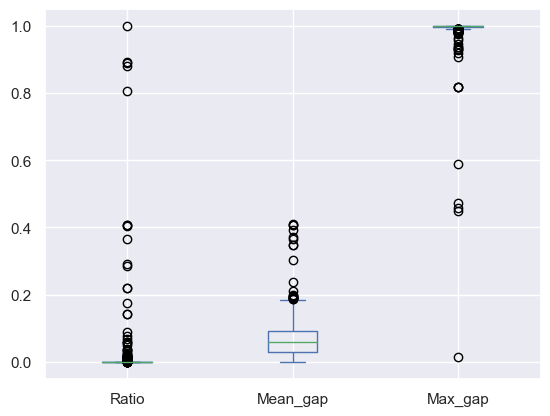

In [41]:
# boxplot
scaled_df.plot.box()
plt.show()

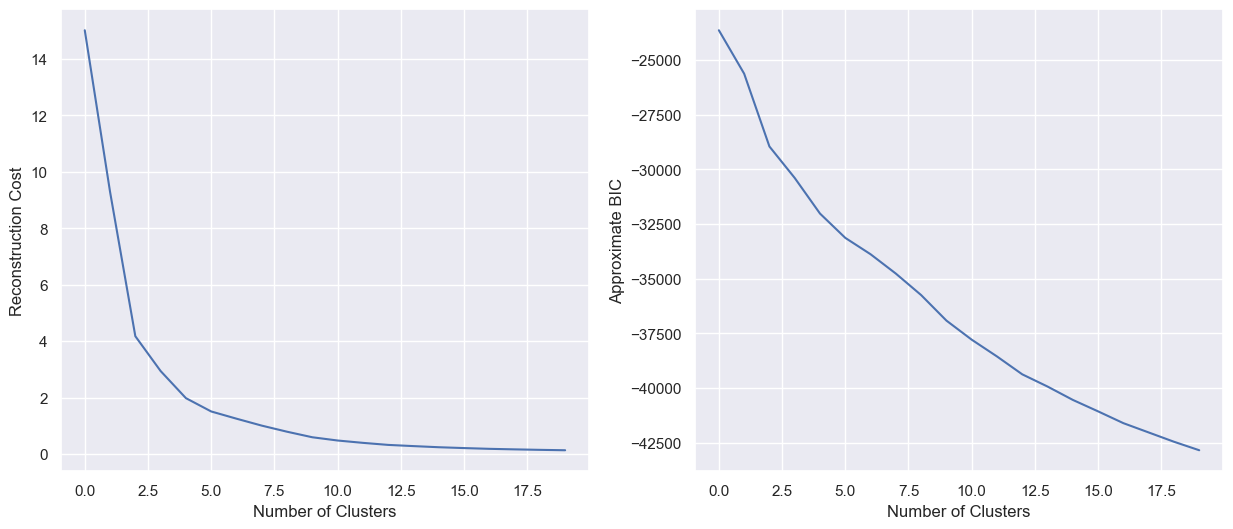

In [42]:
# find optimal k from elbow
num_itts = 10

costs = []
approx_bic = []
for i in range(20):
    c = 0
    a_b = 0
    for r in range(num_itts):
        kmeans = KMeans(n_clusters=i+1, random_state=r).fit(scaled_df)

        c += kmeans.inertia_

        k = np.shape(kmeans.cluster_centers_)[0]*(np.shape(kmeans.cluster_centers_)[1] + 1)
        m = len(scaled_df)        
        a_b += m*np.log(kmeans.inertia_ / m) + k*np.log(m)

    costs.append(c / num_itts)
    approx_bic.append(a_b / num_itts)

fig = plt.figure(figsize=[15, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(costs)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Reconstruction Cost');  

ax = fig.add_subplot(1, 2, 2)
ax.plot(approx_bic)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Approximate BIC');  

In [43]:
# kmean
kmeans = KMeans(n_clusters=2, random_state=2022).fit(scaled_df)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[0.00152638 0.06441028 0.99684707]
 [0.89428478 0.         0.39676161]]
[0 0 0 ... 0 0 0]


In [44]:
# get cluster
nor_clusters = kmeans.predict(scaled_df)
nor_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [45]:
data_with_clusters = scaled_df.copy()
data_with_clusters["Clusters"] = nor_clusters 
data_with_clusters



,Ratio,Mean_gap,Max_gap,Clusters
0,0.000195,0.050889,0.998704,0
1,0.000041,0.168671,0.985672,0
2,0.000569,0.015478,0.999880,0
3,0.000043,0.033797,0.999429,0
4,0.002186,0.040782,0.999166,0
...,...,...,...,...
4197,0.000018,0.003599,0.999994,0
4198,0.000104,0.123143,0.992389,0
4199,0.000255,0.074681,0.997207,0
4200,0.000052,0.131133,0.991365,0


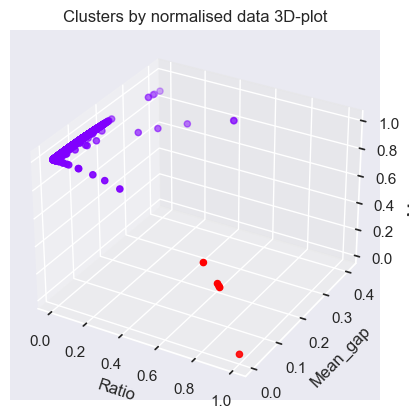

In [46]:
# visualise 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = data_with_clusters["Ratio"], ys = data_with_clusters["Mean_gap"], zs = data_with_clusters["Max_gap"], c = data_with_clusters["Clusters"], cmap="rainbow")
ax.set_title("Clusters by normalised data 3D-plot")
ax.set_xlabel("Ratio")
ax.set_ylabel("Mean_gap")
ax.set_zlabel("Max_gap")

plt.show()

In [48]:
# use for count the number of clusters
data_with_clusters[data_with_clusters["Clusters"]==1].iloc[:,0:1].describe()

,Ratio
count,5.000000
mean,0.894285
std,0.068682
min,0.807520
25%,0.881630
50%,0.889083
75%,0.893301
max,0.999890


## Standardise section

In [49]:
df_features

,Page ID,Ratio,Mean_gap,Max_gap
0,243688,0.061458,16,314
1,243694,0.015560,64,374
2,243709,0.183834,5,323
3,243713,0.035424,28,828
4,243717,0.214412,4,98
...,...,...,...,...
4197,917036,0.070404,14,3890
4198,917039,0.028814,34,274
4199,917040,0.058121,17,227
4200,917041,0.019997,50,378


In [50]:
# select features
df_select_features = df_features.iloc[:,1:]

# standardise
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_select_features)
standardized_df = pd.DataFrame(standardized_data, columns=df_select_features.columns)
standardized_df

,Ratio,Mean_gap,Max_gap
0,-0.052676,-0.465818,-0.272818
1,-0.071856,2.191617,-0.132335
2,-0.001538,-1.074814,-0.251746
3,-0.063555,0.198541,0.930657
4,0.011240,-1.130177,-0.778559
...,...,...,...
4197,-0.048937,-0.576544,8.100001
4198,-0.066317,0.530720,-0.366474
4199,-0.054070,-0.410455,-0.476520
4200,-0.070002,1.416532,-0.122969


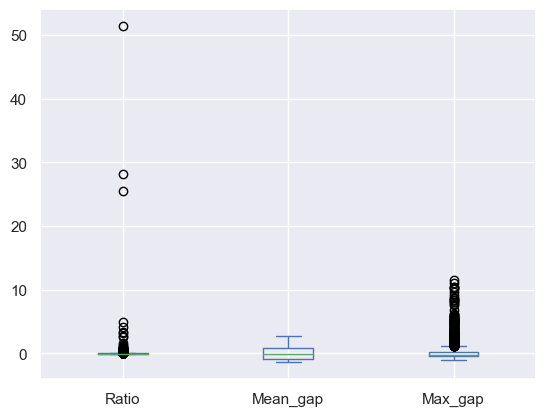

In [51]:
# boxplot
standardized_df.plot.box()
plt.show()

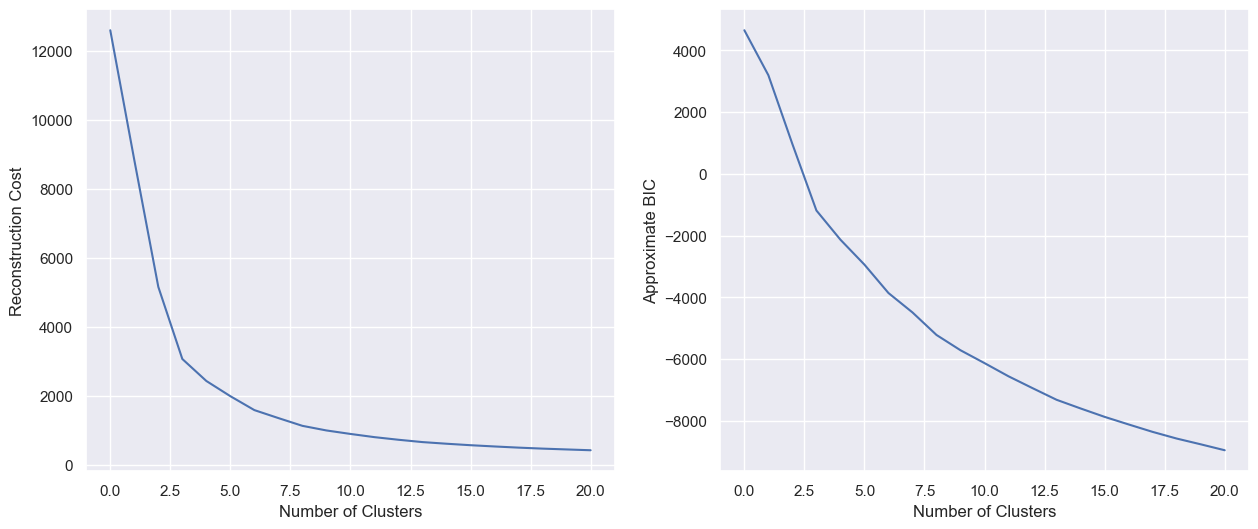

In [52]:
# find optimal k from elbow
num_itts = 10

costs = []
approx_bic = []
for i in range(21):
    c = 0
    a_b = 0
    for r in range(num_itts):
        kmeans = KMeans(n_clusters=i+1, random_state=r).fit(standardized_df)

        c += kmeans.inertia_

        k = np.shape(kmeans.cluster_centers_)[0]*(np.shape(kmeans.cluster_centers_)[1] + 1)
        m = len(standardized_df)        
        a_b += m*np.log(kmeans.inertia_ / m) + k*np.log(m)

    costs.append(c / num_itts)
    approx_bic.append(a_b / num_itts)

fig = plt.figure(figsize=[15, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(costs)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Reconstruction Cost');  

ax = fig.add_subplot(1, 2, 2)
ax.plot(approx_bic)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Approximate BIC');  

In [53]:
# kmean
kmeans = KMeans(n_clusters=3, random_state=2022).fit(standardized_df)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 7.33844124e-04 -6.48397941e-01 -3.46366171e-01]
 [-6.74512158e-02  1.06973555e+00  5.71255742e-01]
 [ 3.50427595e+01 -1.35162970e+00 -6.24807821e-01]]
[0 1 0 ... 0 1 1]


In [54]:
# get cluster
nor_clusters = kmeans.predict(standardized_df)
nor_clusters

array([0, 1, 0, ..., 0, 1, 1], dtype=int32)

In [55]:
data_with_clusters = standardized_df.copy()
data_with_clusters["Clusters"] = nor_clusters 
data_with_clusters


,Ratio,Mean_gap,Max_gap,Clusters
0,-0.052676,-0.465818,-0.272818,0
1,-0.071856,2.191617,-0.132335,1
2,-0.001538,-1.074814,-0.251746,0
3,-0.063555,0.198541,0.930657,1
4,0.011240,-1.130177,-0.778559,0
...,...,...,...,...
4197,-0.048937,-0.576544,8.100001,1
4198,-0.066317,0.530720,-0.366474,1
4199,-0.054070,-0.410455,-0.476520,0
4200,-0.070002,1.416532,-0.122969,1


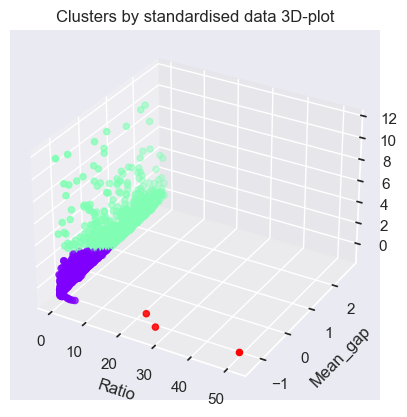

In [56]:
# visualise 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = data_with_clusters["Ratio"], ys = data_with_clusters["Mean_gap"], zs = data_with_clusters["Max_gap"], c = data_with_clusters["Clusters"], cmap="rainbow")
ax.set_title("Clusters by standardised data 3D-plot")
ax.set_xlabel("Ratio")
ax.set_ylabel("Mean_gap")
ax.set_zlabel("Max_gap")

plt.show()